# Telegram data analysis
#### Author: `Yehor Bolotov`


# First: The first is the initialization of libraries and data. We used data from dialogues and conversations, data about groups.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [51]:
DIALOGS_MERGED_DATA_PATH = "Your rep."
DIALOGS_META_MERGED_DATA_PATH = "Your rep."

In [52]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH,low_memory=False)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH,low_memory=False)

# Second: working with data from dialogs and private chats

### 1. Comparison of the number of messages of individual types

Telegram has 5 types of messages (video, sticker, message, voice message, photo). I took data on their quantity from the database and estimated on the schedule that people send more often.

<AxesSubplot:title={'center':'Comparison of the number of messages of individual types'}, xlabel='type'>

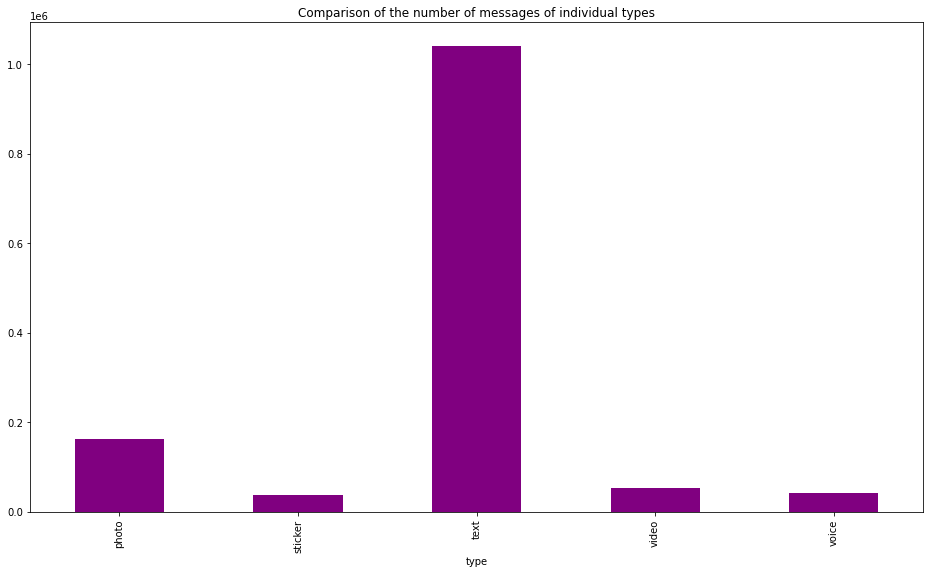

In [53]:
df.groupby(["type"])["type"].count().plot(kind='bar',title = 'Comparison of the number of messages of individual types',
                                          figsize=(16, 9),color='purple')

### 2. Comparison of the total length of media messages

Among these types of messages, only 2 can be long (in terms of seconds) - video and voice messages.

<AxesSubplot:title={'center':'Comparison of the total length of media messages'}, xlabel='type'>

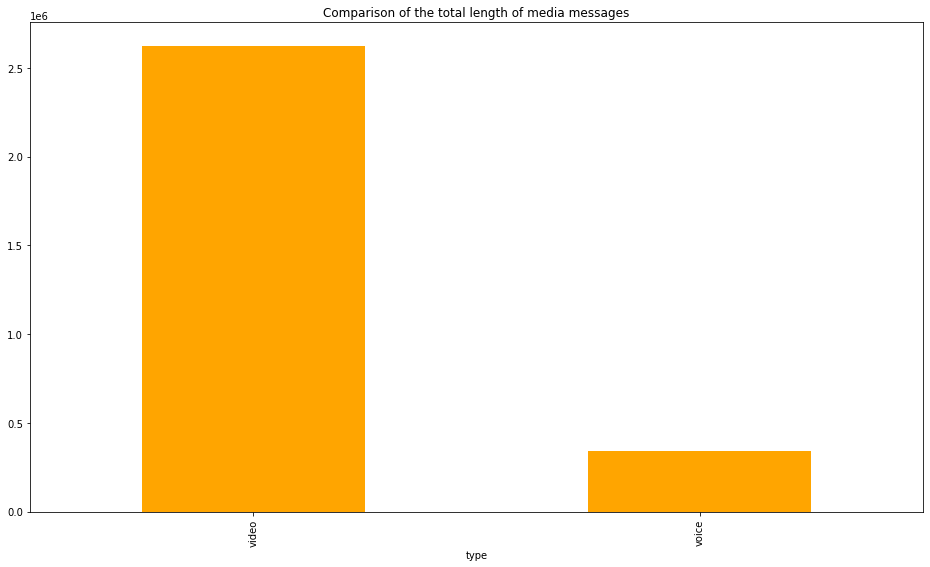

In [54]:
df.groupby(["type"])["duration"].sum().tail(2).plot(kind='bar',title = 'Comparison of the total length of media messages',
                                                    figsize=(16, 9),color = 'orange')

### 3. Find out the 5 most used stickers in messages

Very often, users began to respond to messages with stickers and with the help of this code you can find out the 5 most popular ones

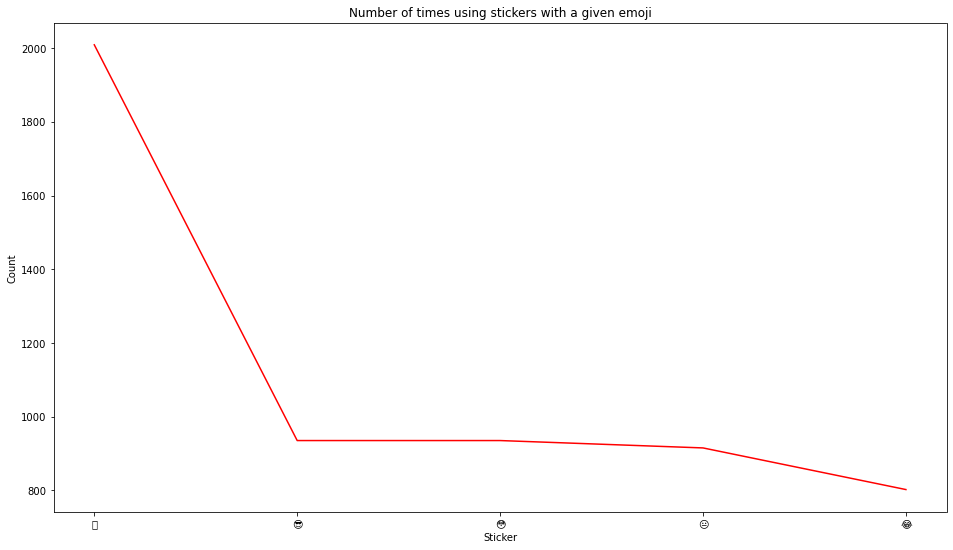

In [55]:
df_st = df[df['type']=='sticker']
df_stickers = df_st["message"].value_counts().head(5)

plt.figure(figsize=(16, 9))
plt.title('Number of times using stickers with a given emoji')
plt.xlabel('Sticker')
plt.ylabel('Count')
plt.plot(df_stickers, color='red')
plt.show()

### 4. Compare the number of messages sent by me / the rest of the participants in the conversations.


The essence: Explore the database of group names, remove duplicates and then compare the number of groups and personal 
    chats that begin with a certain letter. After that, you can display in two graphs, where we can analyze and find out 
    the results.

In [56]:
df_id = df['from_id'] == 'PeerUser(user_id=629737234)'


df_by_me = df[df_id].copy()
df_msg_by_me = df_by_me['date'].copy()

df_msg_by_me = df_msg_by_me.apply(lambda x: x[5:7])

df_msg_by_me=df_msg_by_me.value_counts()
df_msg_by_me.head(12)

12    22900
01    19433
04    15509
02    13126
05    10288
11     8298
03     7815
10     5862
06     4140
07     3352
09     2759
08     2684
Name: date, dtype: int64

Question: 
We will be able to find out the number of messages sent by all (total + by months), can be counted as two questions

In [57]:
df_msg_by_all = df['date'].copy()
df_msg_by_all = df_msg_by_all.apply(lambda x: x[5:7])

df_msg_by_all=df_msg_by_all.value_counts()
df_msg_by_all.head(12)

01    239465
12    211277
11    137350
02    129157
10    114728
09    102283
04     99814
08     86100
05     75623
03     58777
07     45166
06     36950
Name: date, dtype: int64

Answer:

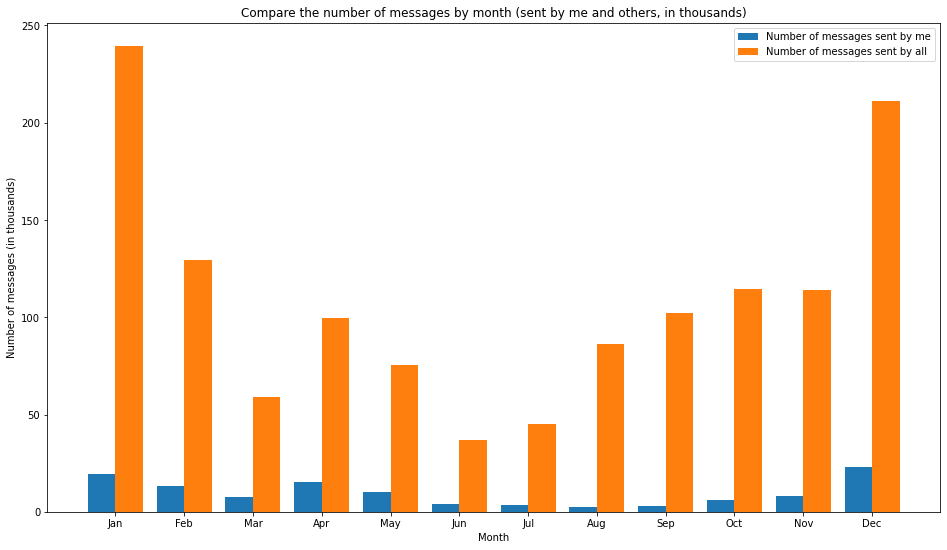

In [58]:
X = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
By_Me = [19.433,13.126,7.815,15.509,10.288,4.140,3.352,2.684,2.759,5.862,8.298,22.900]
By_All = [239.465,129.157,58.777,99.814,75.623,36.950,45.166,86.100,102.283,114.728,113.750,211.277]
  
X_axis = np.arange(len(X))
 
plt.figure(figsize=(16, 9))      
plt.bar(X_axis - 0.2, By_Me, 0.4, label = 'Number of messages sent by me')
plt.bar(X_axis + 0.2, By_All, 0.4, label = 'Number of messages sent by all')

plt.xticks(X_axis, X)
plt.xlabel("Month")
plt.ylabel("Number of messages (in thousands)")
plt.title("Compare the number of messages by month (sent by me and others, in thousands)")
plt.legend()

plt.show()

# Third: working with data from dialogs (users and etc.)

### 1. Group/Private dialog /Channel   ratio in Telegram

There are three types of "groups" in the telegram: the groups themselves, private dialogs and channels. With the help of this code, we can find out the ratio of these types among the database.

<AxesSubplot:title={'center':'Group/Private dialog /Channel ratio in Telegram'}, xlabel='type'>

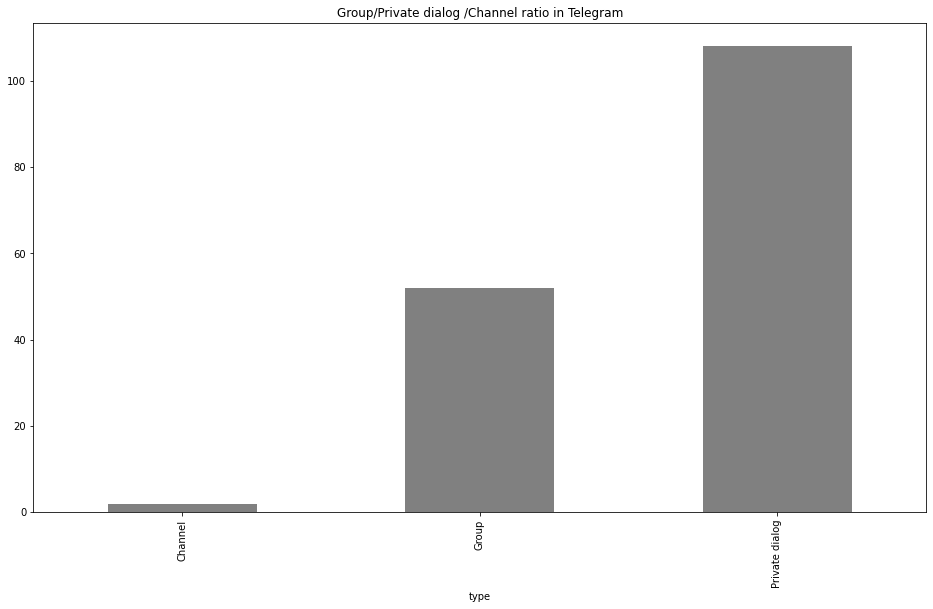

In [59]:
df_meta_uniq = df_meta[['name','type']].copy()
df_meta_uniq = df_meta_uniq.drop_duplicates()
df_meta_uniq.groupby(["type"])["type"].count().plot(kind='bar',title = 'Group/Private dialog /Channel ratio in Telegram',
                                                    figsize=(16, 9),color = 'grey')

### 2. Compare first letters of private chat and group names 

A very strange request, but interesting in the study. Find out the most popular letters used at the beginning of channels/groups/private dialogs.

<AxesSubplot:title={'center':'Number of chats and groups starting with this character'}>

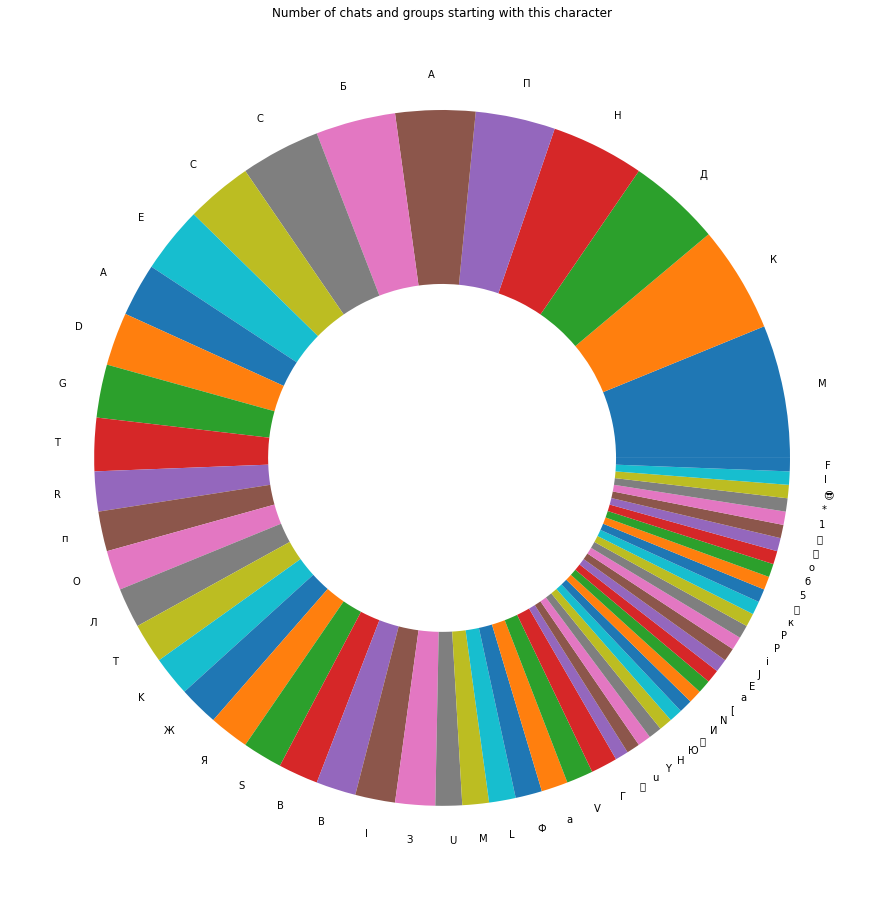

In [63]:
df_flet = df_meta['name'].copy()
df_flet = df_flet.drop_duplicates()
df_flet = df_flet.apply(lambda x: x[0])
df_fletter = df_flet.value_counts()


df_fletter.plot(kind='pie',title = 'Number of chats and groups starting with this character', 
             wedgeprops=dict(width=0.5),figsize=(16, 16),ylabel='' )

The same answer, only in the form of a different graph

<AxesSubplot:title={'center':'Number of chats and groups starting with this character'}>

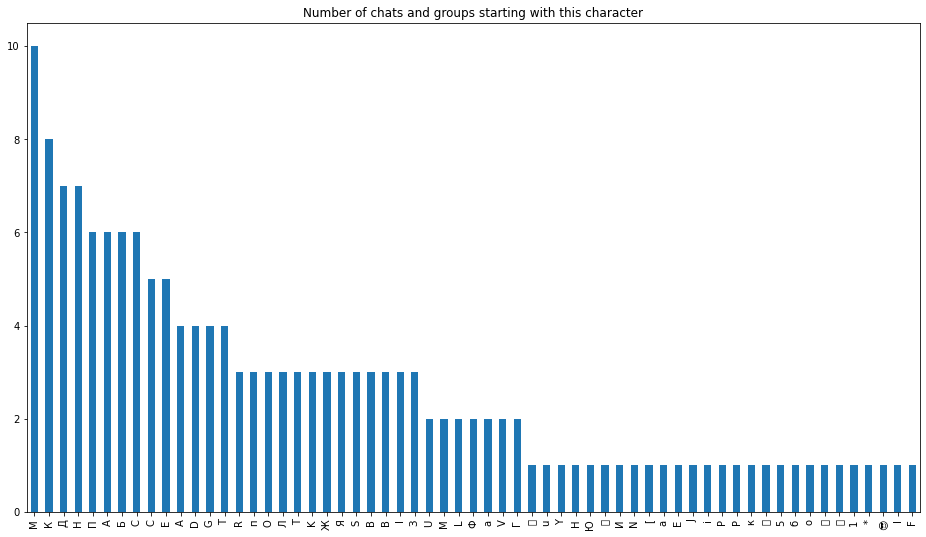

In [62]:
df_fletter.plot(kind='bar',title = 'Number of chats and groups starting with this character',figsize=(16, 9))

### With this code, you can learn the basic tasks for working with telegram data (messages and meta).
Good luck!